# Covid-19 visualization
Internation numbers show that confirmed cases, deaths and mortality rate don't always correlate the same way.
Testing rigour in different countries/Regions might be very different. This is a trial to account for hidden infections

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DATAPATH = '../../data/Coronavirus.history.v2.csv'

In [22]:
def melt(df, label):
    # df_melted = df.melt(id_vars=['parent', 'label', 'lat', 'long'])
    # df_melted['variable'] = pd.to_datetime(df_melted['variable'])
    df_melted = df.pivot_table(values=label, index=['parent', 'lat', 'lon'])
    df_melted = pd.DataFrame.groupby(df_melted, ['parent', 'variable']).sum().pivot_table(index='variable', columns='parent')[('value')]
    return df_melted

def filter_df(df, n=0):
    df_filtered = df[df>=n]  # filter n+ cases
    df_filtered = df_filtered.apply(lambda x: pd.Series(x.dropna().values))
    return df_filtered

In [14]:
df_confirmed = pd.read_csv(DATAPATH)
df_confirmed.head()

,parent,label,date,lon,lat,confirmed,recovered,deaths
0,China,Peking (Beijing),2020-01-27,116.414173,40.182381,80,2,1
1,China,Henan,2020-01-27,113.613964,33.882006,128,0,1
2,USA,Illinois,2020-01-27,-88.986137,40.349457,1,0,0
3,USA,California,2020-01-27,-119.681564,36.116203,2,0,0
4,China,Hainan,2020-01-27,109.745336,19.195864,33,0,1


In [23]:
df_confirmed_melted = melt(df_confirmed, label='confirmed')
df_deaths_melted = melt(df_deaths)
df_recovered_melted = melt(df_recovered)
df_confirmed_filtered = filter_df(df_confirmed_melted, n=100)
df_deaths_filtered = filter_df(df_deaths_melted, n=10)
df_recovered_filtered = filter_df(df_recovered_melted, n=10)

df_confirmed_melted.head()

KeyError: 'variable'

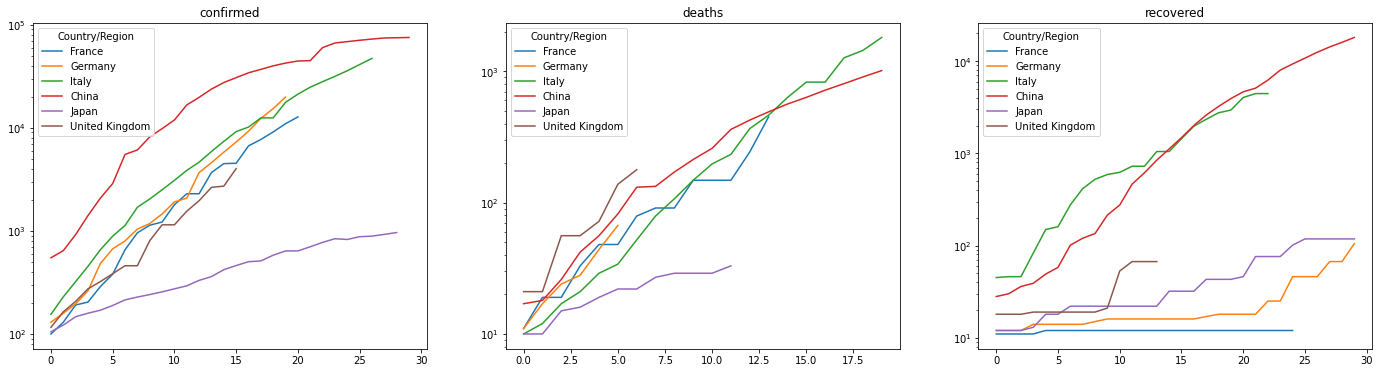

In [19]:
countries = ['France', 'Germany', 'Italy', 'China', 'Japan', 'United Kingdom']
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
df_confirmed_filtered[countries].iloc[:30].plot(title='confirmed', logy=True, ax=axes[0])
df_deaths_filtered[countries].iloc[:20].plot(title='deaths', logy=True, ax=axes[1])
df_recovered_filtered[countries].iloc[:30].plot(title='recovered', logy=True, ax=axes[2])

Country/Region
France             49.492374
Germany             3.227180
Italy             571.074298
China                    inf
Japan               5.825183
United Kingdom     28.648567
dtype: float64

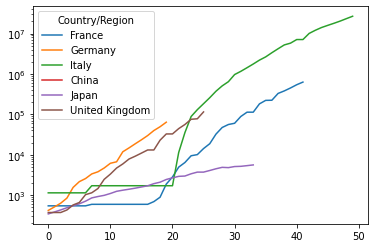

In [28]:
def correct_confirmed(confirmed, deaths, delay=14, mortality_rate=0.007):
    df_diff = deaths / mortality_rate / confirmed.shift(delay, fill_value=0)
    uncert_factor = df_diff.mean()
    new_confirmed = uncert_factor * confirmed
    return new_confirmed, uncert_factor

new_confirmed, factor = correct_confirmed(df_confirmed_melted[countries], df_deaths_melted[countries], delay=14, mortality_rate=0.01)
filter_df(new_confirmed, n=300).plot(logy=True)
factor